Import Python Libraries (Seaborn, Pandas, Numpy, Matplotlib)

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read into Pandas Dataframe, Rename Columns

In [28]:
country_data = pd.read_csv('covid_19_clean_complete.csv')
country_data.rename({'Country/Region': 'Country_Region'}, axis=1, inplace=True)
country_data.head()

,Province/State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [29]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33125 entries, 0 to 33124
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  10000 non-null  object 
 1   Country_Region  33125 non-null  object 
 2   Lat             33125 non-null  float64
 3   Long            33125 non-null  float64
 4   Date            33125 non-null  object 
 5   Confirmed       33125 non-null  int64  
 6   Deaths          33125 non-null  int64  
 7   Recovered       33125 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 2.0+ MB


In [64]:
country_data.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,33125.000000,33125.000000,3.312500e+04,33125.000000,33125.000000
mean,21.181891,22.881195,5.530264e+03,366.236498,1728.502823
std,24.904248,70.245488,4.835556e+04,3315.406205,12244.962870
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000
25%,6.877000,-15.310100,0.000000e+00,0.000000,0.000000
50%,23.634500,21.005900,2.600000e+01,0.000000,1.000000
75%,41.153300,78.000000,5.260000e+02,7.000000,109.000000
max,71.706900,178.065000,1.662302e+06,98220.000000,379157.000000


In [31]:
country_data.columns

Index(['Province/State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

Shows total deaths globally

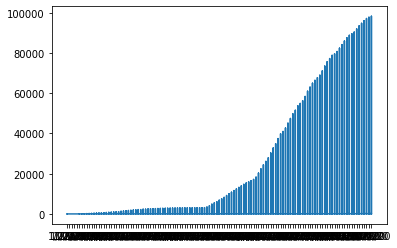

In [32]:
plt.plot(country_data.Date,country_data.Deaths)
plt.show()

Pull United States Data

In [35]:
US = country_data[country_data.Country_Region == 'US']
US

,Province/State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered
225,NaN,US,37.0902,-95.7129,1/22/20,1,0,0
490,NaN,US,37.0902,-95.7129,1/23/20,1,0,0
755,NaN,US,37.0902,-95.7129,1/24/20,2,0,0
1020,NaN,US,37.0902,-95.7129,1/25/20,2,0,0
1285,NaN,US,37.0902,-95.7129,1/26/20,5,0,0
...,...,...,...,...,...,...,...,...
32025,NaN,US,37.0902,-95.7129,5/21/20,1577147,94702,298418
32290,NaN,US,37.0902,-95.7129,5/22/20,1600937,95979,350135
32555,NaN,US,37.0902,-95.7129,5/23/20,1622612,97087,361239
32820,NaN,US,37.0902,-95.7129,5/24/20,1643246,97720,366736


Plot United States Data

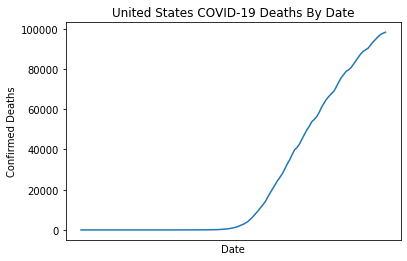

<Figure size 72x288 with 0 Axes>

In [62]:
plt.plot(US.Date,US.Deaths)
plt.xticks([])
plt.xlabel('Date')
plt.ylabel('Confirmed Deaths')
plt.title('United States COVID-19 Deaths By Date')
plt.figure(figsize=(1,4))
plt.show()